# Exercises week 36

## Deriving and Implementing Ridge Regression

## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have?

<u>Answer:</u> Here we will fit four parameters in total, one for each degree of $x$, and one for the intercept. Therefore we say the model will have four degrees of freedom.

**b)** Why is it bad for a model to have too many degrees of freedom?

<u>Answer:</u>: Using to many degrees of freedom we are running the risk of overfitting the model to the training data. Meaning instead of picking out the general trend in the dataset, the model might count in outliers and noise as meaningful. Consequently performing worse on unseen test data.

**c)** Why is it bad for a model to have too few degrees of freedom?

<u>Answer:</u> Having too few degrees of freedom will have the opposite effect of the above. It will be too crude, not being able to to catch the nuances in the data, making it overly generalized. For instance, fitting a line, which will have two degrees of freedom including the intercept, to data that clearly take the shape of an 2. order polynomial, which would yield a model with three degrees of freedom when including the intercept.

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7). What is the expression for the effective degrees of freedom of the ridge regression fit?


<u>Answer:</u> The expression for the effective degrees of freedom of the ridge regression fit is: 

**e)** Why might we want to use Ridge regression instead of OLS?

<u>Answer:</u>

**f)** Why migth we want to use OLS instead of Ridge regression?

<u>Answer:</u>

## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

## Exercise 3 - Scaling data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

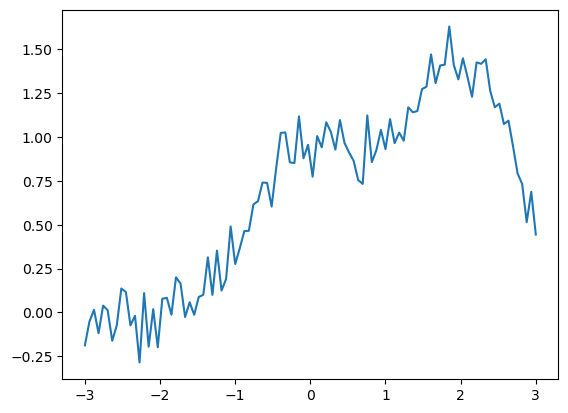

In [3]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, size=n)

plt.plot(x,y)

**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [4]:
def polynomial_features(x, p, intercept=False):
    """
    Take an array of x values, and the desired polynomial degree p.
    Create a feature (design) matrix with first column x**1, second column with x**2, and so on. I.e. the i-th column containing x**(i+1).
    Intercept=True will turn the first column into ones, meaning the i-th column will contain the value x**(j).
    """
    n = len(x)
    if intercept  == True:
        X = np.zeros((int(n), int(p + 1)))
        X[:, 0] = np.ones(n)        # Create first column with only ones, the intercept
        for i in range(1, int(p+1)):
            X[:, i] = x**i
    else:
        X = np.zeros((int(n), int(p)))
        for i in range(0, int(p)):
            X[:, i] = x**(i+1)
    
    return X

**b)** Split your data into training and test data(80/20 split)

In [60]:
X = polynomial_features(x, 3)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0]   # These are used for plotting

**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [62]:
scaler = StandardScaler()
scaler.fit(X_train)                     # Computes the mean and std to be used for later scaling
X_train_s = scaler.transform(X_train)   # Using scaler function on the prepared training set from X
X_test_s = scaler.transform(X_test)     # Using scaler function on the prepared test set from X
y_offset = np.mean(y_train)             # Mean of y values in the training set for y

In [33]:
# Having a view of the scaled features. +/- 5 rows from middle of the matrix
X_train_s[int(n/2)-5:int(n/2)+5,:]

array([[-1.03582023, -0.04755959, -0.50671815],
       [-0.31375468, -1.04010763, -0.03757842],
       [-0.2793706 , -1.05848815, -0.03453886],
       [-0.58882727, -0.79853509, -0.10573886],
       [-0.07306616, -1.11362971, -0.02887259],
       [-1.62034949,  1.60406135, -1.97328745],
       [ 1.33668088,  1.03951683,  1.34239183],
       [-1.13897246,  0.18876137, -0.67405905],
       [ 1.47421718,  1.48590087,  1.7901411 ],
       [ 0.16762236, -1.05848815, -0.02320115]])

In [34]:
# Comparing to the non scaled features.
X_train[int(n/2)-5:int(n/2)+5,:]

array([[-1.72727273e+00,  2.98347107e+00, -5.15326822e+00],
       [-4.54545455e-01,  2.06611570e-01, -9.39143501e-02],
       [-3.93939394e-01,  1.55188246e-01, -6.11347636e-02],
       [-9.39393939e-01,  8.82460973e-01, -8.28978490e-01],
       [-3.03030303e-02,  9.18273646e-04, -2.78264741e-05],
       [-2.75757576e+00,  7.60422406e+00, -2.09692239e+01],
       [ 2.45454545e+00,  6.02479339e+00,  1.47881292e+01],
       [-1.90909091e+00,  3.64462810e+00, -6.95792637e+00],
       [ 2.69696970e+00,  7.27364555e+00,  1.96168016e+01],
       [ 3.93939394e-01,  1.55188246e-01,  6.11347636e-02]])

## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [ ]:
def Ridge_parameters(X, y, ridge_lambda):
    # Assumes X is scaled and has no intercept column
    I = np.identity(np.shape(X)[1])    # Create identity matrix same shape as X.T @ X, columns of X decide the shape, (nxm)(mxn)=(nxn)
    # Element-wise multiplication with * 
    return np.linalg.pinv(X.T @ X + ridge_lambda*I) @ X.T @ y

In [63]:
ridge_lambda = 1
beta_s = Ridge_parameters(X_train_s, y_train, ridge_lambda)
print(beta_s)

[ 0.71416517 -0.1408266  -0.28195065]


**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

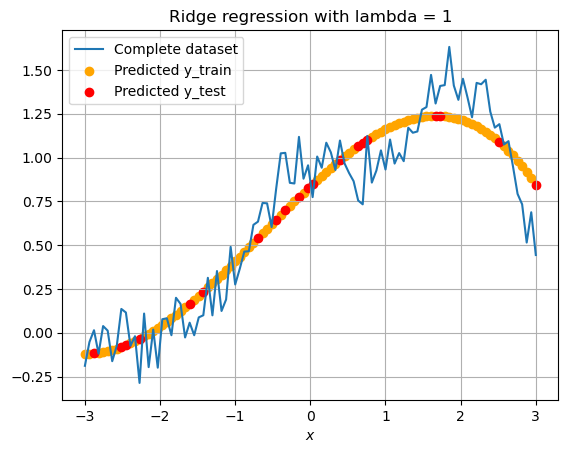

In [64]:
plt.plot(x, y, label="Complete dataset")
plt.scatter(x_train, X_train_s @ beta_s + y_offset, color="orange", label="Predicted y_train")
plt.scatter(x_test, X_test_s @ beta_s + y_offset, color="red", label="Predicted y_test")
plt.legend()
plt.grid()
plt.xlabel(r"$x$")
plt.title(f"Ridge regression with lambda = {ridge_lambda}")
plt.show()
plt.close()

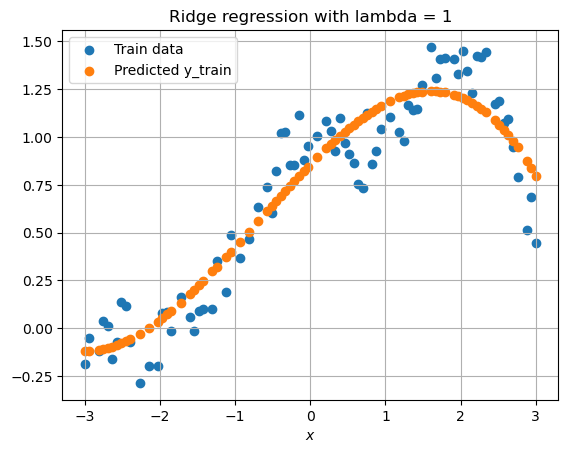

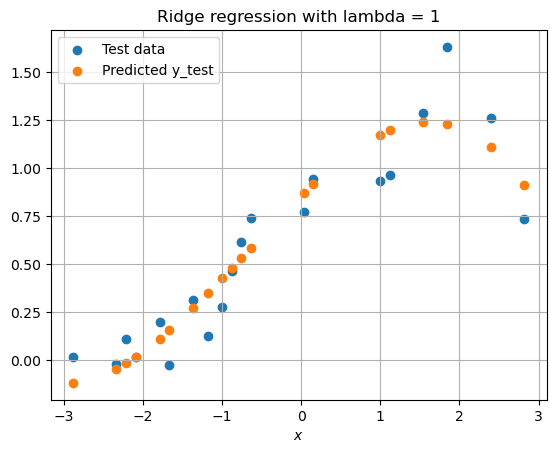

In [13]:
plt.scatter(x_train, y_train, label="Train data")
plt.scatter(x_train, X_train_s @ beta_s + y_offset, label="Predicted y_train")
plt.legend()
plt.grid()
plt.xlabel(r"$x$")
plt.title(f"Ridge regression with lambda = {ridge_lambda}")
plt.show()
plt.close()

plt.scatter(x_test, y_test, label="Test data")
plt.scatter(x_test, X_test_s @ beta_s + y_offset, label="Predicted y_test")
plt.legend()
plt.grid()
plt.xlabel(r"$x$")
plt.title(f"Ridge regression with lambda = {ridge_lambda}")
plt.show()
plt.close()

In [15]:
#Compare with standard use of OLS on X_test
from sklearn.preprocessing import PolynomialFeatures # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression

poly_model = LinearRegression().fit(X_train, y_train)  # Performing the regression on x and y, i.e. deciding the beta parameters: X*beta=y

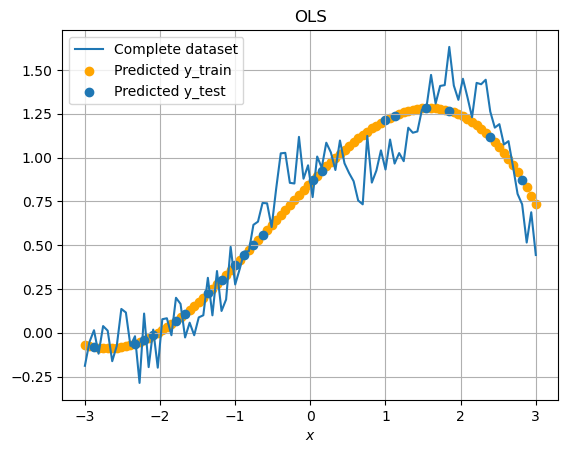

In [24]:
plt.plot(x, y, label="Complete dataset")
plt.scatter(x_train, poly_model.predict(X_train), color="orange", label="Predicted y_train")
plt.scatter(x_test, poly_model.predict(X_test), label="Predicted y_test")
plt.xlabel(r"$x$")
plt.title("OLS")
plt.legend()
plt.grid()
plt.show()
plt.close()
###

## Exercise 4 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

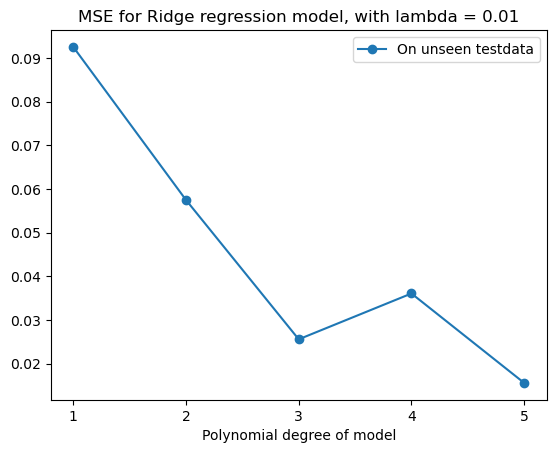

In [377]:
from sklearn.metrics import mean_squared_error

poly_min = 1
poly_max = 5
poly_degree = np.arange(poly_min, poly_max + 1, 1)
ridge_lambda = 0.01  # Ridge lambda

MSE_Ridge_model_poly = np.zeros(len(poly_degree))

for i in range(len(poly_degree)):
    X_poly = polynomial_features(x, poly_degree[i])
    X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2)

    scaler_poly = StandardScaler()
    scaler_poly.fit(X_poly_train)                           # Computes the mean and std to be used for later scaling
    X_poly_train_s = scaler_poly.transform(X_poly_train)    # Using scaler function on the prepared training set from X
    X_poly_test_s = scaler_poly.transform(X_poly_test)      # Using scaler function on the prepared test set from X
    y_poly_offset = np.mean(y_poly_train)                   # Mean of y values in the training set for y

    beta_poly_s = Ridge_parameters(X_poly_train_s, y_poly_train, ridge_lambda=ridge_lambda)
    predict_y_poly_test = X_poly_test_s @ beta_poly_s + y_poly_offset
    MSE_Ridge_model_poly[i] = mean_squared_error(y_poly_test, predict_y_poly_test)

from matplotlib.ticker import MultipleLocator
plt.xticks(np.arange(min(poly_degree), max(poly_degree)+1, 1))  # Force integer ticks on x-axis

plt.plot(poly_degree, MSE_Ridge_model_poly, 'o-', label="On unseen testdata")
plt.title(f"MSE for Ridge regression model, with lambda = {ridge_lambda}")
plt.xlabel("Polynomial degree of model")
plt.legend()
plt.show()
plt.close()

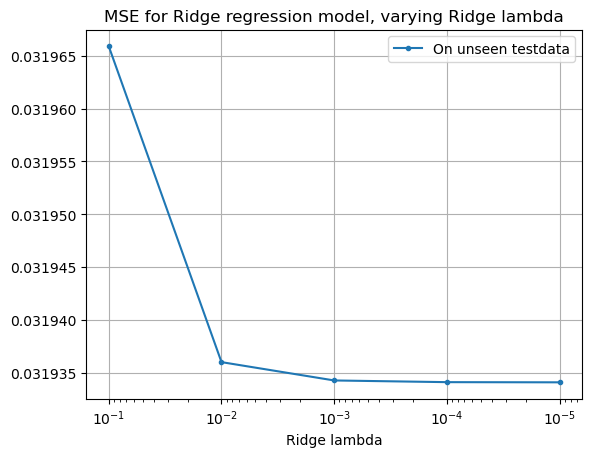

In [414]:
poly_deg = 3

exp_start = -1
exp_stop = -5
ridge_lambdas = np.logspace(exp_start, exp_stop, abs(exp_stop-exp_start)+1) # np.logspace takes 1e(exp_start) and 1e(exp_stop) as arguments, 1e1 step

MSE_Ridge_model_lambdas = np.zeros(len(ridge_lambdas))

X3 = polynomial_features(x, poly_deg)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2)

scaler3 = StandardScaler()
scaler3.fit(X3_train)                       # Computes the mean and std to be used for later scaling
X3_train_s = scaler3.transform(X3_train)    # Using scaler function on the prepared training set from X
X3_test_s = scaler3.transform(X3_test)      # Using scaler function on the prepared test set from X
y3_offset = np.mean(y3_train)               # Mean of y values in the training set for y

for i in range(len(ridge_lambdas)):
    beta_ridge = Ridge_parameters(X3_train_s, y3_train, ridge_lambda=ridge_lambdas[i])
    predict_y3_test = X3_test_s @ beta_ridge + y3_offset
    MSE_Ridge_model_lambdas[i] = mean_squared_error(y3_test, predict_y3_test)

plt.semilogx(ridge_lambdas, MSE_Ridge_model_lambdas, ".-", label="On unseen testdata")
plt.gca().invert_xaxis()    # Flips the x-axis direction
plt.grid()
plt.title(f"MSE for Ridge regression model, varying Ridge lambda")
plt.xlabel("Ridge lambda")
plt.legend()
plt.show()
plt.close()


In [331]:
def find_MSE_Ridge_predict_test_polys(x_data, y_data, poly_min, poly_max, ridge_lambda):
    """
    Calculate the MSE 
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_squared_error

    x = x_data
    y = y_data

    poly_degrees = np.arange(poly_min, poly_max + 1, 1)
    MSE_Ridge_model_poly = np.zeros(len(poly_degrees))

    for i in range(len(poly_degrees)):
        X_poly = polynomial_features(x, poly_degrees[i])
        X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2)

        scaler_poly = StandardScaler()
        scaler_poly.fit(X_poly_train)                           # Computes the mean and std to be used for later scaling
        X_poly_train_s = scaler_poly.transform(X_poly_train)    # Using scaler function on the prepared training set from X
        X_poly_test_s = scaler_poly.transform(X_poly_test)      # Using scaler function on the prepared test set from X
        y_poly_offset = np.mean(y_poly_train)                   # Mean of y values in the training set for y

        beta_poly_s = Ridge_parameters(X_poly_train_s, y_poly_train, ridge_lambda=ridge_lambda)
        predict_y_poly_test = X_poly_test_s @ beta_poly_s + y_poly_offset
        MSE_Ridge_model_poly[i] = mean_squared_error(y_poly_test, predict_y_poly_test)

    return poly_degrees, MSE_Ridge_model_poly

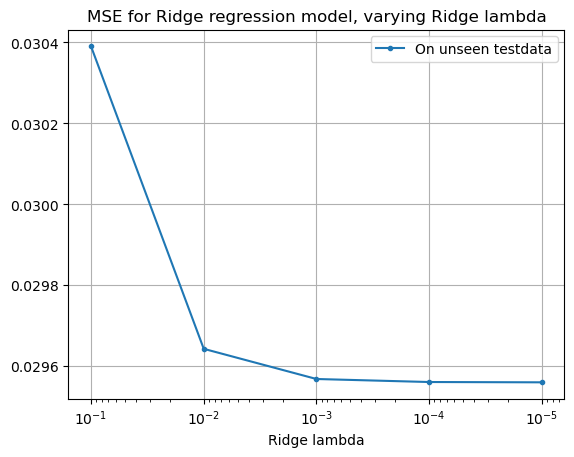

In [404]:
def find_MSE_Ridge_predict_test_lambdas(x_data, y_data, poly_degree, ridge_lambda_start, ridge_lambda_stop):
    """
    Calculate the MSE
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_squared_error

    x = x_data
    y = y_data
    poly_degree = int(poly_degree)
    exp_start = np.log10(ridge_lambda_start)
    exp_stop = np.log10(ridge_lambda_stop)

    ridge_lambdas = np.logspace(exp_start, exp_stop, int(abs(exp_stop-exp_start)+1)) # np.logspace takes 1e(exp_start) and 1e(exp_stop) as arguments, 1e1 step
    MSE_Ridge_model_lambdas = np.zeros(len(ridge_lambdas))

    X = polynomial_features(x, poly_degree)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    scaler.fit(X_train)                       # Computes the mean and std to be used for later scaling
    X_train_s = scaler.transform(X_train)    # Using scaler function on the prepared training set from X
    X_test_s = scaler.transform(X_test)      # Using scaler function on the prepared test set from X
    y_offset = np.mean(y_train)               # Mean of y values in the training set for y

    for i in range(len(ridge_lambdas)):
        beta_ridge = Ridge_parameters(X_train_s, y_train, ridge_lambda=ridge_lambdas[i])
        predict_y_test = X_test_s @ beta_ridge + y_offset
        MSE_Ridge_model_lambdas[i] = mean_squared_error(y_test, predict_y_test)

    return ridge_lambdas, MSE_Ridge_model_lambdas

poly_deg = 3

ridge_lambdas, MSE_Ridge_model_lambdas = find_MSE_Ridge_predict_test_lambdas(x, y, poly_deg, 1e-1, 1e-5)

plt.semilogx(ridge_lambdas, MSE_Ridge_model_lambdas, ".-", label="On unseen testdata")
plt.gca().invert_xaxis()    # Flips the x-axis direction
plt.grid()
plt.title(f"MSE for Ridge regression model, varying Ridge lambda")
plt.xlabel("Ridge lambda")
plt.legend()
plt.show()
plt.close()


In [368]:
def find_MSE_Ridge_predict_poly_ridgelambda(x_data, y_data, poly_degree, ridge_lambda):
    """
    Calculate the MSE
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_squared_error

    x = x_data
    y = y_data
    poly_degree = int(poly_degree)
    
    X = polynomial_features(x, poly_degree)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    scaler.fit(X_train)                       # Computes the mean and std to be used for later scaling
    X_train_s = scaler.transform(X_train)    # Using scaler function on the prepared training set from X
    X_test_s = scaler.transform(X_test)      # Using scaler function on the prepared test set from X
    y_offset = np.mean(y_train)               # Mean of y values in the training set for y

    beta_ridge = Ridge_parameters(X_train_s, y_train, ridge_lambda)
    predict_y_test = X_test_s @ beta_ridge + y_offset
    MSE_Ridge_model_lambdas = mean_squared_error(y_test, predict_y_test)

    return MSE_Ridge_model_lambdas

In [373]:
poly_min = 1
poly_max = 5
poly_degrees = np.arange(poly_min, poly_max + 1, 1)

exp_start = -1
exp_stop = -5
ridge_lambdas = np.logspace(exp_start, exp_stop, abs(exp_stop-exp_start)+1) # np.logspace takes 1e(exp_start) and 1e(exp_stop) as arguments, 1e1 step

MSE_polys_ridgelambdas_matrix = np.zeros((len(ridge_lambdas), len(poly_degrees)))

for i in range(len(poly_degrees)):
    for j in range(len(ridge_lambdas)):
        MSE_Ridge_poly_ridgelambda = find_MSE_Ridge_predict_poly_ridgelambda(x, y, poly_degrees[i], ridge_lambdas[j])
        MSE_polys_ridgelambdas_matrix[i,j] = MSE_Ridge_poly_ridgelambda

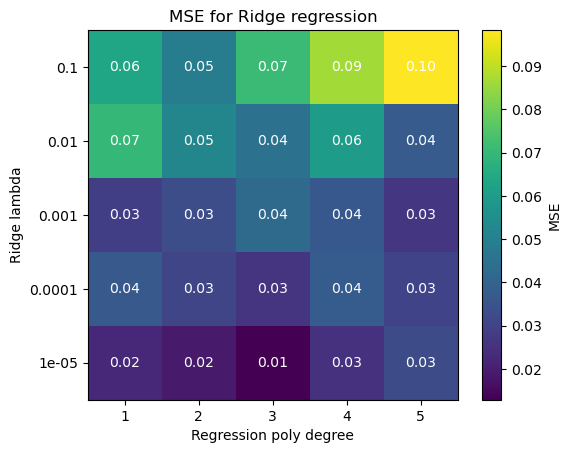

In [ ]:
fig, ax = plt.subplots()

# Annotate each cell with its value, copied from Copilot answer
for i in range(MSE_polys_ridgelambdas_matrix.shape[0]):
    for j in range(MSE_polys_ridgelambdas_matrix.shape[1]):
        text = ax.text(j, i, f"{MSE_polys_ridgelambdas_matrix[i, j]:.2f}",
                       ha="center", va="center", color="white")

ax.set_xticks(np.arange(len(poly_degrees)))
ax.set_xticklabels(poly_degrees)
ax.set_yticks(np.arange(len(ridge_lambdas)))
ax.set_yticklabels(ridge_lambdas)

plt.imshow(MSE_polys_ridgelambdas_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='MSE')
plt.title("MSE for Ridge regression")
plt.xlabel("Regression poly degree")
plt.ylabel("Ridge lambda")
plt.show()